<a href="https://colab.research.google.com/github/pandi018/Kidney_disease_prediction/blob/main/Copy_of_kidney_disease_using_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
%matplotlib inline

In [ ]:
p=pd.read_csv('./kidney_disease_train (1).csv')

In [ ]:
p.head(10)


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300,4.6,yes,no,no,poor,no,no,ckd
5,175,60.0,50.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,4200,3.4,yes,no,no,good,no,no,ckd
6,351,29.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,40.0,9900,4.7,no,no,no,good,no,no,notckd
7,332,34.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,44.0,10500,6.1,no,no,no,good,no,no,notckd
8,167,34.0,70.0,1.020,0.0,0.0,abnormal,normal,notpresent,notpresent,...,42.0,2200,NaN,no,no,no,poor,no,no,ckd
9,245,48.0,100.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,19.0,7200,2.6,yes,no,yes,poor,no,no,ckd


In [ ]:
p.describe

<bound method NDFrame.describe of       id   age     bp     sg   al   su     rbc        pc         pcc  \
0    157  62.0   70.0  1.025  3.0  0.0  normal  abnormal  notpresent   
1    109  54.0   70.0    NaN  NaN  NaN     NaN       NaN  notpresent   
2     17  47.0   80.0    NaN  NaN  NaN     NaN       NaN  notpresent   
3    347  43.0   60.0  1.025  0.0  0.0  normal    normal  notpresent   
4     24  42.0  100.0  1.015  4.0  0.0  normal  abnormal  notpresent   
..   ...   ...    ...    ...  ...  ...     ...       ...         ...   
275   71  46.0   60.0  1.010  1.0  0.0  normal    normal  notpresent   
276  106  50.0   90.0    NaN  NaN  NaN     NaN       NaN  notpresent   
277  270  23.0   80.0  1.025  0.0  0.0  normal    normal  notpresent   
278  348  38.0   80.0  1.020  0.0  0.0  normal    normal  notpresent   
279  102  17.0   60.0  1.010  0.0  0.0     NaN    normal  notpresent   

             ba  ...   pcv     wc   rc  htn   dm  cad  appet   pe  ane  \
0    notpresent  ...  39.0 

In [ ]:
p.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         id    age     bp     sg     al     su    rbc     pc    pcc     ba  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False   True   True   True   True   True  False  False   
2    False  False  False   True   True   True   True   True  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
275  False  False  False  False  False  False  False  False  False  False   
276  False  False  False   True   True   True   True   True  False  False   
277  False  False  False  False  False  False  False  False  False  False   
278  False  False  False  False  False  False  False  False  False  False   
279  False  False  False  False  False  False   True  False  False  False   

     ...    p

In [ ]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              280 non-null    int64  
 1   age             275 non-null    float64
 2   bp              271 non-null    float64
 3   sg              244 non-null    float64
 4   al              245 non-null    float64
 5   su              242 non-null    float64
 6   rbc             173 non-null    object 
 7   pc              230 non-null    object 
 8   pcc             276 non-null    object 
 9   ba              276 non-null    object 
 10  bgr             247 non-null    float64
 11  bu              266 non-null    float64
 12  sc              268 non-null    float64
 13  sod             213 non-null    float64
 14  pot             212 non-null    float64
 15  hemo            241 non-null    float64
 16  pcv             229 non-null    float64
 17  wc              203 non-null    obj

In [ ]:
p.shape

(280, 26)

<BarContainer object of 26 artists>

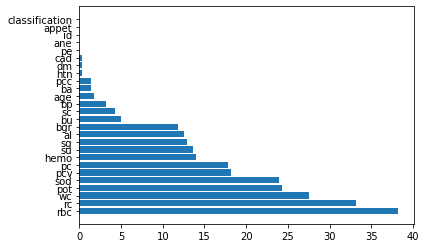

In [ ]:
missing_values = (p.isnull().sum()/len(p)) * 100                 
missing_values.sort_values(ascending=False,inplace=True)
plt.barh(y=missing_values.index,width= missing_values.values)

In [ ]:
p['classification'].replace({'ckd':1,'notckd':0},inplace=True) 
p.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,1
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,1
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,1
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200,5.5,no,no,no,good,no,no,0
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300,4.6,yes,no,no,poor,no,no,1
5,175,60.0,50.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,4200,3.4,yes,no,no,good,no,no,1
6,351,29.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,40.0,9900,4.7,no,no,no,good,no,no,0
7,332,34.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,44.0,10500,6.1,no,no,no,good,no,no,0
8,167,34.0,70.0,1.020,0.0,0.0,abnormal,normal,notpresent,notpresent,...,42.0,2200,NaN,no,no,no,poor,no,no,1
9,245,48.0,100.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,19.0,7200,2.6,yes,no,yes,poor,no,no,1


In [ ]:
p.select_dtypes('object').nunique()

rbc       2
pc        2
pcc       2
ba        2
wc       78
rc       48
htn       2
dm        4
cad       3
appet     2
pe        2
ane       2
dtype: int64

In [ ]:
p.drop(columns=['wc','rc','dm','cad','id'],inplace=True)

In [ ]:
p.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,sc,sod,pot,hemo,pcv,htn,appet,pe,ane,classification
0,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,122.0,...,1.7,136.0,4.7,12.6,39.0,yes,good,no,no,1
1,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,233.0,...,1.9,NaN,NaN,11.7,NaN,no,good,no,no,1


In [ ]:
dummies = list(p.select_dtypes('object').columns) # create dummies and drop drop_first !
dummies

['rbc', 'pc', 'pcc', 'ba', 'htn', 'appet', 'pe', 'ane']

In [ ]:
p.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,sc,sod,pot,hemo,pcv,htn,appet,pe,ane,classification
0,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,122.0,...,1.7,136.0,4.7,12.6,39.0,yes,good,no,no,1
1,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,233.0,...,1.9,NaN,NaN,11.7,NaN,no,good,no,no,1


In [ ]:
p = pd.get_dummies(p,columns=dummies)
p.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,ba_notpresent,ba_present,htn_no,htn_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,62.0,70.0,1.025,3.0,0.0,122.0,42.0,1.7,136.0,4.7,...,1,0,0,1,1,0,1,0,1,0
1,54.0,70.0,NaN,NaN,NaN,233.0,50.1,1.9,NaN,NaN,...,1,0,1,0,1,0,1,0,1,0
2,47.0,80.0,NaN,NaN,NaN,114.0,87.0,5.2,139.0,3.7,...,1,0,0,1,0,1,1,0,1,0
3,43.0,60.0,1.025,0.0,0.0,108.0,25.0,1.0,144.0,5.0,...,1,0,1,0,1,0,1,0,1,0
4,42.0,100.0,1.015,4.0,0.0,NaN,50.0,1.4,129.0,4.0,...,0,1,0,1,0,1,1,0,1,0


In [ ]:
correlation = abs(p.corr().sort_values(by='classification')['classification'])
correlation

sg                0.757986
hemo              0.756028
pcv               0.727636
rbc_normal        0.684856
htn_no            0.580132
pc_normal         0.500231
appet_good        0.416242
pe_no             0.368337
sod               0.354435
ane_no            0.318642
pcc_notpresent    0.175150
ba_notpresent     0.102111
pot               0.101139
ba_present        0.192148
pcc_present       0.249717
age               0.256630
rbc_abnormal      0.265302
bp                0.276949
sc                0.285913
ane_yes           0.318642
su                0.352065
pc_abnormal       0.359476
bu                0.365920
pe_yes            0.368337
appet_poor        0.416242
bgr               0.446966
htn_yes           0.590838
al                0.635497
classification    1.000000
Name: classification, dtype: float64

In [ ]:
p.corr()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,ba_notpresent,ba_present,htn_no,htn_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
age,1.000000,0.159061,-0.216672,0.141512,0.182331,0.248271,0.197669,0.137053,-0.125302,0.059592,...,-0.015179,0.055859,-0.413640,0.412567,-0.148148,0.148148,-0.101806,0.101806,-0.102525,0.102525
bp,0.159061,1.000000,-0.226841,0.115326,0.222696,0.149322,0.163732,0.165294,-0.086903,0.093219,...,-0.025409,0.058501,-0.247674,0.251410,-0.161961,0.161961,-0.015813,0.015813,-0.188568,0.188568
sg,-0.216672,-0.226841,1.000000,-0.467827,-0.278341,-0.382860,-0.341058,-0.405656,0.440390,-0.098296,...,0.153115,-0.199261,0.429410,-0.442521,0.308557,-0.308557,0.288558,-0.288558,0.298076,-0.298076
al,0.141512,0.115326,-0.467827,1.000000,0.306732,0.460787,0.445732,0.353454,-0.433237,0.151559,...,-0.298689,0.380323,-0.560104,0.568530,-0.366073,0.366073,-0.479573,0.479573,-0.316498,0.316498
su,0.182331,0.222696,-0.278341,0.306732,1.000000,0.650541,0.197614,0.295447,-0.125928,0.289096,...,-0.059410,0.093038,-0.325331,0.330117,-0.114822,0.114822,-0.189527,0.189527,-0.161444,0.161444
bgr,0.248271,0.149322,-0.382860,0.460787,0.650541,1.000000,0.147776,0.147585,-0.302412,0.099336,...,-0.016197,0.062631,-0.387256,0.396897,-0.257702,0.257702,-0.112306,0.112306,-0.219263,0.219263
bu,0.197669,0.163732,-0.341058,0.445732,0.197614,0.147776,1.000000,0.609569,-0.276002,0.399230,...,-0.149596,0.201294,-0.333359,0.335671,-0.255794,0.255794,-0.346008,0.346008,-0.401168,0.401168
sc,0.137053,0.165294,-0.405656,0.353454,0.295447,0.147585,0.609569,1.000000,-0.714504,0.358307,...,-0.033501,0.063115,-0.221532,0.224340,-0.085972,0.085972,-0.175258,0.175258,-0.189028,0.189028
sod,-0.125302,-0.086903,0.440390,-0.433237,-0.125928,-0.302412,-0.276002,-0.714504,1.000000,0.127225,...,0.058244,-0.098001,0.322634,-0.321603,0.138722,-0.138722,0.124497,-0.124497,0.159779,-0.159779
pot,0.059592,0.093219,-0.098296,0.151559,0.289096,0.099336,0.399230,0.358307,0.127225,1.000000,...,0.011545,-0.005085,-0.065261,0.065065,0.034574,-0.034574,-0.072423,0.072423,-0.139870,0.139870


In [ ]:
select = list(correlation[correlation > 0.3].index)
select

['sg',
 'hemo',
 'pcv',
 'rbc_normal',
 'htn_no',
 'pc_normal',
 'appet_good',
 'pe_no',
 'sod',
 'ane_no',
 'ane_yes',
 'su',
 'pc_abnormal',
 'bu',
 'pe_yes',
 'appet_poor',
 'bgr',
 'htn_yes',
 'al',
 'classification']

In [ ]:
p[select].isnull().sum()

sg                36
hemo              39
pcv               51
rbc_normal         0
htn_no             0
pc_normal          0
appet_good         0
pe_no              0
sod               67
ane_no             0
ane_yes            0
su                38
pc_abnormal        0
bu                14
pe_yes             0
appet_poor         0
bgr               33
htn_yes            0
al                35
classification     0
dtype: int64

In [ ]:
#p.fillna(0,inplace=True) 
#p.head()
p.dropna(how='any',inplace=True)
p.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,ba_notpresent,ba_present,htn_no,htn_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
0,62.0,70.0,1.025,3.0,0.0,122.0,42.0,1.7,136.0,4.7,...,1,0,0,1,1,0,1,0,1,0
3,43.0,60.0,1.025,0.0,0.0,108.0,25.0,1.0,144.0,5.0,...,1,0,1,0,1,0,1,0,1,0
6,29.0,80.0,1.020,0.0,0.0,83.0,49.0,0.9,139.0,3.3,...,1,0,1,0,1,0,1,0,1,0
10,56.0,60.0,1.025,0.0,0.0,132.0,18.0,1.1,147.0,4.7,...,1,0,1,0,1,0,1,0,1,0
12,42.0,80.0,1.020,0.0,0.0,98.0,20.0,0.5,140.0,3.5,...,1,0,1,0,1,0,1,0,1,0


In [ ]:
X = p.drop(columns='classification')    # Split label and datsets
y = p['classification']

In [ ]:
X.to_csv('kidney.csv')
X.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        age     bp     sg     al     su    bgr     bu     sc    sod    pot  \
0    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
6    False  False  False  False  False  False  False  False  False  False   
10   False  False  False  False  False  False  False  False  False  False   
12   False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
273  False  False  False  False  False  False  False  False  False  False   
275  False  False  False  False  False  False  False  False  False  False   
277  False  False  False  False  False  False  False  False  False  False   
278  False  False  False  False  False  False  False  False  False  False   
279  False  False  False  False  False  False  False  False  False  False   

     ...  ba_

In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
X_train

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,ba_notpresent,ba_present,htn_no,htn_yes,appet_good,appet_poor,pe_no,pe_yes,ane_no,ane_yes
213,51.0,60.0,1.020,0.0,0.0,129.0,25.0,1.2,139.0,5.0,...,1,0,1,0,1,0,1,0,1,0
98,57.0,60.0,1.020,0.0,0.0,132.0,18.0,1.1,150.0,4.7,...,1,0,1,0,1,0,1,0,1,0
226,22.0,60.0,1.025,0.0,0.0,97.0,18.0,1.2,138.0,4.3,...,1,0,1,0,1,0,1,0,1,0
248,73.0,80.0,1.020,2.0,0.0,253.0,142.0,4.6,138.0,5.8,...,1,0,0,1,1,0,1,0,1,0
185,48.0,80.0,1.015,0.0,2.0,214.0,24.0,1.3,140.0,4.0,...,1,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,61.0,70.0,1.025,0.0,0.0,120.0,29.0,0.7,137.0,3.5,...,1,0,1,0,1,0,1,0,1,0
204,52.0,80.0,1.025,0.0,0.0,99.0,25.0,0.8,135.0,3.7,...,1,0,1,0,1,0,1,0,1,0
31,23.0,80.0,1.020,0.0,0.0,99.0,46.0,1.2,142.0,4.0,...,1,0,1,0,1,0,1,0,1,0
179,30.0,80.0,1.020,0.0,0.0,131.0,38.0,1.0,147.0,3.8,...,1,0,1,0,1,0,1,0,1,0



STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
LogisticRegression()
> 
THEY GIVEN THE WORKING MESSAGE FOR US BECAUSE OUR DATASET SHOULD BE IN THE FORM OF O'S AND 1'S .SO WE HAVE SCALE THEM




In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

NOW THE SCALEING PART OVER SO WE HAVE FIT AND RUN OUR ALGORITHM


In [ ]:
y_train

213    0
98     0
226    0
248    1
185    1
      ..
146    0
204    0
31     0
179    0
196    0
Name: classification, Length: 108, dtype: int64

In [ ]:
#y_test.describe
y_test=scaler.fit_transform(y_test.values.reshape(-1,1))

In [ ]:
#y_test.describe
y_train=scaler.fit_transform(y_train.values.reshape(-1,1))

In [ ]:
X_train.shape

(108, 28)

In [ ]:
#model.predict(X_test)
X_train

array([[0.5       , 0.2       , 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.57692308, 0.2       , 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.12820513, 0.2       , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.14102564, 0.6       , 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.23076923, 0.6       , 0.75      , ..., 0.        , 1.        ,
        0.        ],
       [0.15384615, 0.4       , 1.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
prediction1=model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
model.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


0.9166666666666666

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model1=ExtraTreesClassifier(n_estimators=100, random_state=0)


In [ ]:
model1.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesClassifier(random_state=0)

In [ ]:
prediction2=model1.predict(X_test)

In [ ]:
model1.score(X_test,y_test)

0.9722222222222222

In [ ]:
 from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(X_test,y_test)
prediction=model2.predict(X_test)

In [ ]:
model2.score(X_test,y_test)

1.0

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [ ]:
model3.predict(X_test)

array([0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0.])

In [ ]:
model3.score(X_test,y_test)

1.0

In [ ]:
from sklearn.svm import SVC
model4 = SVC(kernel='linear') 

In [ ]:
model4.fit(X_train,y_train)
model4.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0.])

In [ ]:
model4.score(X_test,y_test)

1.0

In [ ]:
, GradientBoostingClassifier
>>> from sklearn.ensemble import GradientBoostingClassifier
model5=GradientBoostingClassifier()
model5.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [ ]:
model5.predict(X_test)

array([0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0.])

In [ ]:
model5.score(X_test,y_test)

0.9444444444444444

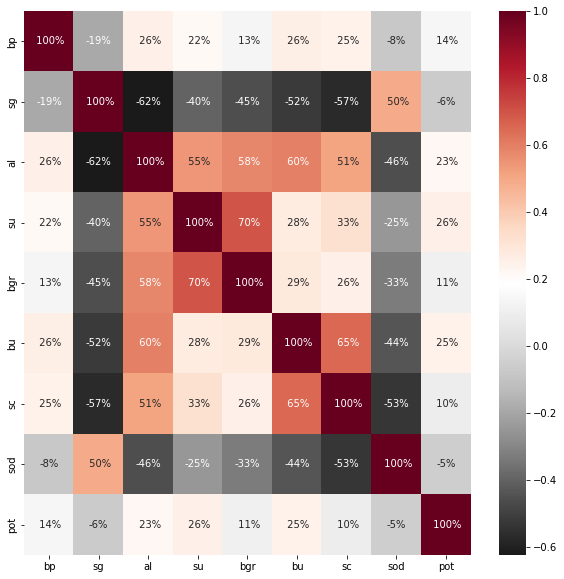

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(p.iloc[:,1:10].corr(),annot=True,cmap='RdGy_r',fmt=' .0%') 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


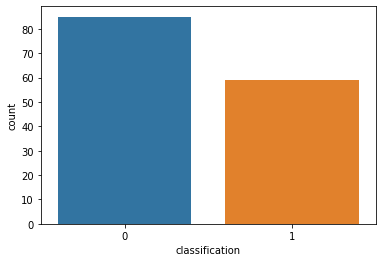

In [ ]:
#now all the catogorical values are converted into numerical 
sns.countplot(p['classification'])

In [ ]:
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
print("accuracy for logisticregression",accuracy_score(y_test,model.predict(X_test)))  
print("accuracy for Native Bayes",accuracy_score(y_test,model1.predict(X_test)))  
print("accuracy for DecisionTreeClassifier",accuracy_score(y_test,model2.predict(X_test)))  
print("accuracy for RandomForestClassifier",accuracy_score(y_test,model3.predict(X_test)))  
print("accuracy for SVM",accuracy_score(y_test,model4.predict(X_test)))   


accuracy for logisticregression 0.9166666666666666
accuracy for Native Bayes 0.9722222222222222
accuracy for DecisionTreeClassifier 1.0
accuracy for RandomForestClassifier 1.0
accuracy for SVM 1.0


In [ ]:
print("Classification_report")
print("accuracy for logisticregression",classification_report(y_test,model.predict(X_test)))  
print("accuracy for Native Bayes",classification_report(y_test,model1.predict(X_test)))  
print("accuracy for DecisionTreeClassifier",classification_report(y_test,model2.predict(X_test)))  
print("accuracy for RandomForestClassifier",classification_report(y_test,model3.predict(X_test)))  
print("accuracy for SVM",classification_report(y_test,model4.predict(X_test)))
print("accuracy of model5",classification_report(y_test,model5.predict(X_test)))

Classification_report
accuracy for logisticregression               precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        20
         1.0       1.00      0.81      0.90        16

    accuracy                           0.92        36
   macro avg       0.93      0.91      0.91        36
weighted avg       0.93      0.92      0.92        36

accuracy for Native Bayes               precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        20
         1.0       1.00      0.94      0.97        16

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

accuracy for DecisionTreeClassifier               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       1.00      1.00      1.00        16

    accuracy                           1.00        36
   macro avg

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction2)
print(cm)

[[20  0]
 [ 1 15]]


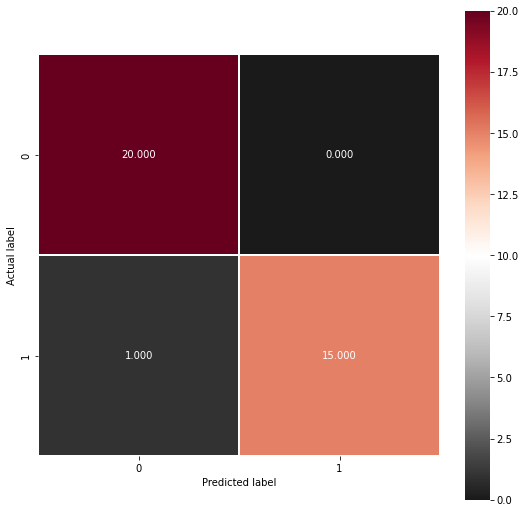

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'RdGy_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [ ]:
X.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'rbc_abnormal', 'rbc_normal', 'pc_abnormal', 'pc_normal',
       'pcc_notpresent', 'pcc_present', 'ba_notpresent', 'ba_present',
       'htn_no', 'htn_yes', 'appet_good', 'appet_poor', 'pe_no', 'pe_yes',
       'ane_no', 'ane_yes'],
      dtype='object')

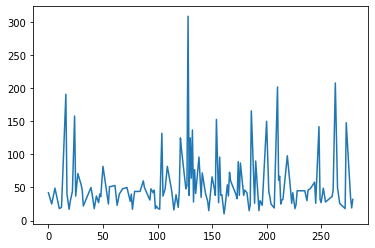

In [ ]:
X['bu'].plot() 
# pc_normal?